### Import Raw Data

In [3]:
import pandas as pd
import numpy as np

path_to_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

col_name = ['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'ModelYear', 'Origin', 'Model']
df = pd.read_csv(path_to_file,delim_whitespace=True, names=col_name)


print(df.head())

    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0      130.0  3504.0          12.0         70   
1  15.0          8         350.0      165.0  3693.0          11.5         70   
2  18.0          8         318.0      150.0  3436.0          11.0         70   
3  16.0          8         304.0      150.0  3433.0          12.0         70   
4  17.0          8         302.0      140.0  3449.0          10.5         70   

   Origin                      Model  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


### Transform Bad Data Values and Merge Original Dataframe with Country Name Dataframe by CountryID

In [4]:
new = df.replace('?', np.nan)

country = pd.DataFrame({'Origin': [1, 2, 3], 'CountryName': ['USA', 'Asia', 'Europe']})

transform = new.merge(country, left_on= 'Origin', right_on= 'Origin')

new_transform = transform.astype({'Horsepower': 'float'})

print(new_transform.head())

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   
4  17.0          8         302.0       140.0  3449.0          10.5         70   

   Origin                      Model CountryName  
0       1  chevrolet chevelle malibu         USA  
1       1          buick skylark 320         USA  
2       1         plymouth satellite         USA  
3       1              amc rebel sst         USA  
4       1                ford torino         USA  


### Show Number of Cars with Certain Number of Cylinders

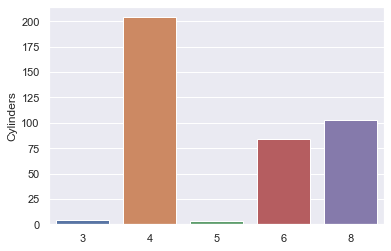

In [16]:
import seaborn as sns

sns.set(style="darkgrid")
sns.barplot(x=transform['Cylinders'].value_counts().index, y=transform['Cylinders'].value_counts())

### Update X- and Y- Axes to Avoid Overcrowding Values

In [6]:
hp_incs = []

end = new_transform['Horsepower'].max()

start = new_transform['Horsepower'].min()

increment = np.math.ceil(end/25)

for x in range(increment + 1):
    x *= 25
    hp_incs.append(x)

print(hp_incs)

end = new_transform['Weight'].max()

start = new_transform['Weight'].min()

increment = np.math.ceil(end/1500)

wt_incs = []

for x in range(increment + 1):
    x *= 1500
    wt_incs.append(x)

print(wt_incs)

new_transform.dtypes

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
[0, 1500, 3000, 4500, 6000]


MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
ModelYear         int64
Origin            int64
Model            object
CountryName      object
dtype: object

### Plot Scatterplot Graph

### Scatterplot Graph 1: The Basic Analysis Between Horsepower and Weight in X-Y Axis

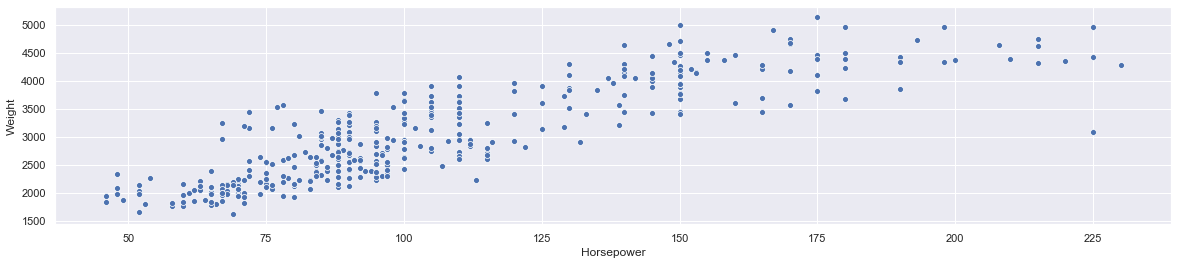

In [9]:
import matplotlib as plt

fig_dims = (20, 4)

fig, ax = plt.pyplot.subplots(figsize=fig_dims)

ax.set(xlabel=hp_incs, ylabel=wt_incs)

sns.scatterplot(x=new_transform['Horsepower'], y=new_transform['Weight'], ax=ax)


### Scatterplot Graph 2: Adding Hue to Differentiate Country of Manufacturer

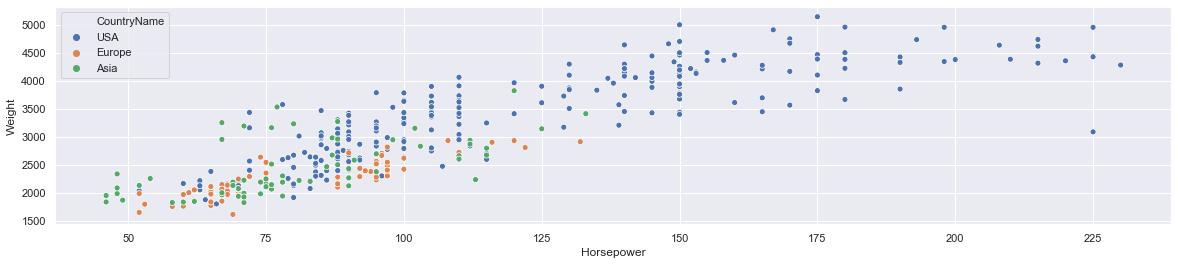

In [10]:
fig_dims = (20, 4)

fig, ax = plt.pyplot.subplots(figsize=fig_dims)

ax.set(xlabel=hp_incs, ylabel=wt_incs)

sns.scatterplot(x=new_transform['Horsepower'], y=new_transform['Weight'], hue = new_transform['CountryName'], ax=ax)


### Scatterplot Graph 3: Adding Cylinders to Size of Plots and Analyzing MPG vs. Weight (Instead of Horsepower vs. Weight)

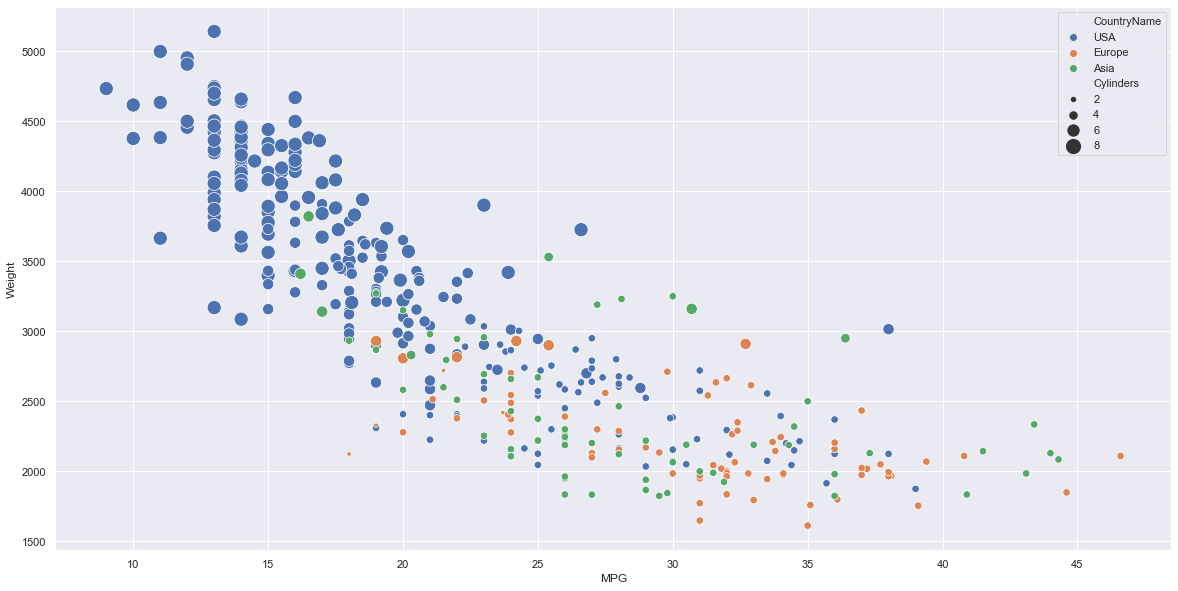

In [15]:
fig_dims = (20, 10)

fig, ax = plt.pyplot.subplots(figsize=fig_dims)

ax.set(xlabel=hp_incs, ylabel=wt_incs)

sns.scatterplot(x=new_transform['MPG'], y=new_transform['Weight'], size = new_transform['Cylinders'], sizes=(20, 200), hue = new_transform['CountryName'], ax=ax)

### In conclusion, the USA produces powerful, heavier cars, European models offer a middle-ground between power, weight and and mileage and Asian models lean towards more practical cars for mileage and weight, but tend to offer less power. 